
## Step 3: Implementing a linear regression algorithm  

### Background: 
Once we have the information from the satellite band pixels and the respective soil moisture values, we can implement a linear regression algorithm that can correlate  the band pixels (we will call this input) and soil moisture (output). There are plenty of machine learning algorithms. A good website where examples and Python implemented algorithms are compiled is https://scikit-learn.org/stable/.



Let's install the necessary python library. Open the terminal and pass the following command.

Let's start importing the csv file generated in Step 2:

In [1]:
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
sma = pd.read_csv('./Results Step 2/machine_learning_data.csv')
sma=sma.loc[:, sma.columns != 'CROP']
sma['ST_B6'] = sma['ST_B6'] /273.15

sma.round(2)#.head(3)

,SR_B1,SR_B2,SR_B3,SR_B4,SR_B5,ST_B6,SR_B7,AFRI1600,AFRI2100,ARVI,...,TDVI,TGI,TSAVI,TVI,TriVI,VARI,VIG,WDRVI,WDVI,SM
0,0.05,0.08,0.07,0.39,0.20,1.09,0.10,0.49,0.77,0.78,...,0.57,2.46,0.70,1.10,19.83,0.14,0.09,-0.27,0.32,0.39
1,0.05,0.08,0.07,0.39,0.21,1.10,0.10,0.47,0.76,0.76,...,0.55,2.38,0.68,1.09,19.17,0.11,0.07,-0.31,0.31,0.32
2,0.06,0.10,0.08,0.37,0.20,1.10,0.10,0.48,0.76,0.71,...,0.52,2.68,0.65,1.07,18.24,0.16,0.10,-0.36,0.29,0.50
3,0.06,0.10,0.08,0.36,0.20,1.10,0.10,0.46,0.76,0.70,...,0.49,2.49,0.62,1.06,17.24,0.11,0.07,-0.40,0.28,0.47
4,0.13,0.17,0.21,0.27,0.34,1.17,0.30,0.10,0.29,0.35,...,0.10,0.96,0.13,0.79,2.10,-0.16,-0.11,-0.77,0.06,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.04,0.07,0.04,0.56,0.21,1.12,0.09,0.60,0.85,0.88,...,0.84,2.94,0.85,1.16,32.15,0.34,0.23,0.12,0.52,0.17
67,0.08,0.11,0.12,0.44,0.30,1.15,0.17,0.38,0.68,0.71,...,0.53,1.78,0.57,1.04,18.90,-0.06,-0.04,-0.46,0.32,0.11
68,0.08,0.12,0.14,0.45,0.33,1.15,0.18,0.35,0.66,0.70,...,0.51,1.99,0.52,1.01,18.06,-0.09,-0.07,-0.51,0.31,0.08
69,0.06,0.08,0.07,0.45,0.21,1.12,0.09,0.54,0.81,0.78,...,0.65,2.02,0.72,1.11,23.25,0.10,0.07,-0.24,0.38,0.16


In [3]:
cor_matrix=sma.corr().abs()
print(cor_matrix.round(2))

       SR_B1  SR_B2  SR_B3  SR_B4  SR_B5  ST_B6  SR_B7  AFRI1600  AFRI2100  \
SR_B1   1.00   0.99   0.98   0.65   0.85   0.75   0.94      0.92      0.95   
SR_B2   0.99   1.00   0.98   0.62   0.88   0.76   0.95      0.91      0.94   
SR_B3   0.98   0.98   1.00   0.68   0.85   0.79   0.94      0.94      0.96   
SR_B4   0.65   0.62   0.68   1.00   0.34   0.51   0.50      0.79      0.74   
SR_B5   0.85   0.88   0.85   0.34   1.00   0.77   0.95      0.82      0.83   
...      ...    ...    ...    ...    ...    ...    ...       ...       ...   
VARI    0.79   0.77   0.86   0.82   0.63   0.75   0.71      0.88      0.83   
VIG     0.78   0.76   0.86   0.82   0.63   0.75   0.70      0.87      0.82   
WDRVI   0.84   0.83   0.88   0.91   0.64   0.72   0.73      0.92      0.87   
WDVI    0.83   0.81   0.86   0.96   0.57   0.66   0.71      0.92      0.89   
SM      0.03   0.06   0.03   0.37   0.25   0.38   0.18      0.08      0.01   

       ARVI  ...  TDVI   TGI  TSAVI   TVI  TriVI  VARI   VIG  W

In [4]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri.round(2))

       SR_B1  SR_B2  SR_B3  SR_B4  SR_B5  ST_B6  SR_B7  AFRI1600  AFRI2100  \
SR_B1    NaN   0.99   0.98   0.65   0.85   0.75   0.94      0.92      0.95   
SR_B2    NaN    NaN   0.98   0.62   0.88   0.76   0.95      0.91      0.94   
SR_B3    NaN    NaN    NaN   0.68   0.85   0.79   0.94      0.94      0.96   
SR_B4    NaN    NaN    NaN    NaN   0.34   0.51   0.50      0.79      0.74   
SR_B5    NaN    NaN    NaN    NaN    NaN   0.77   0.95      0.82      0.83   
...      ...    ...    ...    ...    ...    ...    ...       ...       ...   
VARI     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
VIG      NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
WDRVI    NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
WDVI     NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   
SM       NaN    NaN    NaN    NaN    NaN    NaN    NaN       NaN       NaN   

       ARVI  ...  TDVI   TGI  TSAVI   TVI  TriVI  VARI   VIG  W

In [5]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
# print()
print(to_drop)

['SR_B2', 'SR_B3', 'SR_B7', 'AFRI2100', 'ARVI', 'ATSAVI', 'AVI', 'BNDVI', 'BWDRVI', 'CIG', 'DSI', 'DSWI1', 'DSWI5', 'DVI', 'DVIplus', 'EVI', 'EVI2', 'ExGR', 'ExR', 'FCVI', 'GARI', 'GBNDVI', 'GCC', 'GDVI', 'GEMI', 'GLI', 'GNDVI', 'GOSAVI', 'GRNDVI', 'GRVI', 'GSAVI', 'GVMI', 'IAVI', 'IPVI', 'MCARI1', 'MCARI2', 'MGRVI', 'MNDVI', 'MNLI', 'MRBVI', 'MSAVI', 'MSI', 'MSR', 'MTVI1', 'MTVI2', 'NDGI', 'NDII', 'NDMI', 'NDPI', 'NDVI', 'NGRDI', 'NIRv', 'NIRvH2', 'NLI', 'NormG', 'NormNIR', 'NormR', 'OCVI', 'OSAVI', 'RCC', 'RDVI', 'RGBVI', 'RGRI', 'RI', 'SARVI', 'SAVI', 'SAVI2', 'SEVI', 'SI', 'SR', 'SR2', 'TDVI', 'TGI', 'TSAVI', 'TVI', 'TriVI', 'VARI', 'VIG', 'WDRVI', 'WDVI']


In [6]:
df1 = sma.drop(to_drop, axis=1)
# print();
print(df1.head())

      SR_B1     SR_B4     SR_B5     ST_B6  AFRI1600       BCC       CVI  \
0  0.048572  0.389078  0.202627  1.094886  0.488404  0.245526  3.970534   
1  0.051515  0.385447  0.209448  1.095987  0.472065  0.245745  3.947225   
2  0.063257  0.370955  0.199245  1.097827  0.476565  0.263950  3.096275   
3  0.063257  0.363613  0.202682  1.100017  0.462103  0.257883  3.251376   
4  0.130055  0.271680  0.335288  1.166050  0.102218  0.255294  1.984076   

      DSWI2     DSWI3     DSWI4       ExG      IKAW       NDDI      NDYI  \
0  2.486532  2.990039  1.202494  0.046640  0.164991  27.318928  0.253090   
1  2.473400  2.852245  1.153168  0.044412  0.175414  32.835289  0.243511   
2  2.047108  2.519856  1.230935  0.052332  0.111099  19.179018  0.212174   
3  2.082426  2.392734  1.149013  0.046695  0.144967  27.010372  0.212174   
4  1.977893  1.597672  0.807765 -0.000880  0.234779  -3.488522  0.131729   

       NMDI     NRFIg     NRFIr    SM  
0  0.584506 -0.104960 -0.195017  0.39  
1  0.570515 

In [7]:
list(df1.columns)

['SR_B1',
 'SR_B4',
 'SR_B5',
 'ST_B6',
 'AFRI1600',
 'BCC',
 'CVI',
 'DSWI2',
 'DSWI3',
 'DSWI4',
 'ExG',
 'IKAW',
 'NDDI',
 'NDYI',
 'NMDI',
 'NRFIg',
 'NRFIr',
 'SM']

## Setting up a regression algorithm
Now that the data is in the adequate format (a table), we will run the ML algorithm. The bands will be inputs (x) and soil moisture the output (y)

Let's try all the data (all rows and all remote sensing information)

Intercept: 0.31
Slope: 0.68


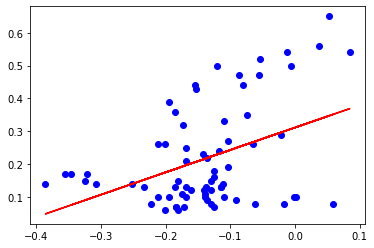

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from mlxtend.regressor import LinearRegression

inputs=df1.loc[:, df1.columns != 'SM']
X=inputs.loc[:, inputs.columns == 'NRFIr']

t=sma[['SM']].to_numpy()
# t=pd.Series(t)
t=t.ravel()

ne_lr = LinearRegression()
ne_lr.fit(X, t)
y=ne_lr.predict(X)

print('Intercept: %.2f' % ne_lr.b_)
print('Slope: %.2f' % ne_lr.w_[0])

def lin_regplot(X, t, model):
    plt.scatter(X, t, c='blue')
    plt.plot(X, model.predict(X), color='red')    
    return

lin_regplot(X, t, ne_lr)
plt.show()

Let's plot the results

In [9]:
import math
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(t, y)
rmse = math.sqrt(mse)
print('RMSE = %.2f' %rmse, "m3/m3")

RMSE = 0.14 m3/m3


In [10]:
r2 = r2_score(t, y)
print("r2 =%.2f" %r2)

r2 =0.18


Looping through all variables.

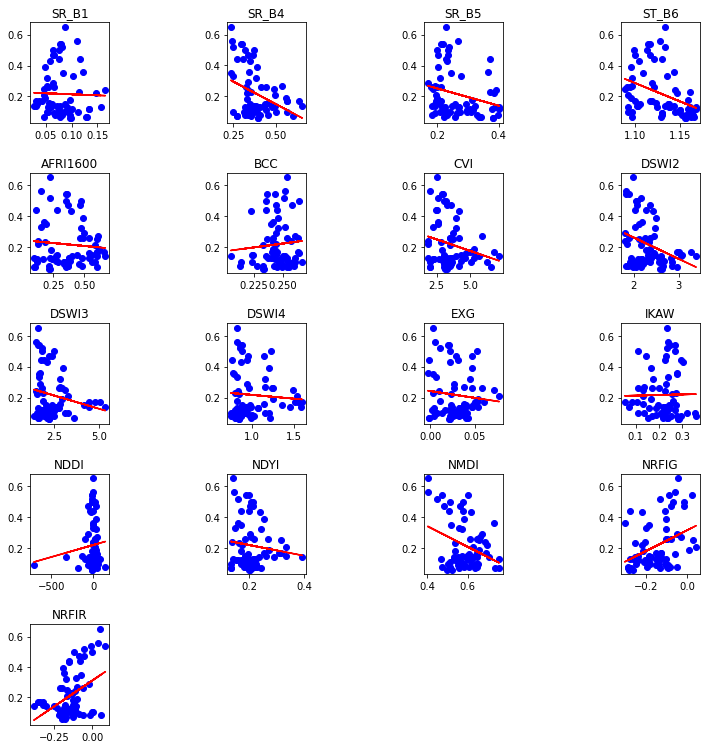

In [11]:

plt.figure(figsize=(12, 60))
plt.subplots_adjust(hspace=0.5, wspace=1.5)
# plt.suptitle("SM vs vegetation indices", fontsize=18, y=0.95)

# def lin_regplot(x, t, model):
#     plt.scatter(x, t, c='blue')
#     plt.plot(x, model.predict(x), color='red')    
#     return


# loop through the length of tickers and keep track of index
n=0

for column in inputs:
    # add a new subplot iteratively
    # x = inputs[column]
    x=inputs.loc[:, inputs.columns == column]#.to_numpy()
    ne_lr = LinearRegression()
    ne_lr.fit(x, t)
    y=ne_lr.predict(x)

    ax = plt.subplot(22, 4, n + 1)
    n=n+1
#     # filter df and plot ticker on the new subplot axis
    # inputs[inputs["variable"] == column].plot(ax=ax, kind='scatter',y ='SM', x='values',c = 'CROP' , cmap = "magma")
    ax.scatter(x, t, color='blue')
    ax.plot(x, y, color='red')  
#     # chart formatting
    ax.set_title(column.upper())
#     # ax.get_legend().remove()
#     ax.set_xlabel("")
    

    # lin_regplot(x, t, ne_lr)
    # plt.show()

We have two questions: Which of the variables can best represent the variability in soil moisture and how we deal with a small number of variables.

For the first question, we can test each of the variables indivudually and then combine the most promissing.

For the second question, we need to use a concept called "CrossValidation". We will divide the total number of samples and change training and testing groups for "n" times, while tracking a goodness of fit statistic, like Mean Square Error or Coefficient of Determination (r2).

Let's implement this 

In [12]:
inputs

,SR_B1,SR_B4,SR_B5,ST_B6,AFRI1600,BCC,CVI,DSWI2,DSWI3,DSWI4,ExG,IKAW,NDDI,NDYI,NMDI,NRFIg,NRFIr
0,0.048572,0.389078,0.202627,1.094886,0.488404,0.245526,3.970534,2.486532,2.990039,1.202494,0.046640,0.164991,27.318928,0.253090,0.584506,-0.104960,-0.195017
1,0.051515,0.385447,0.209448,1.095987,0.472065,0.245745,3.947225,2.473400,2.852245,1.153168,0.044412,0.175414,32.835289,0.243511,0.570515,-0.102586,-0.172463
2,0.063257,0.370955,0.199245,1.097827,0.476565,0.263950,3.096275,2.047108,2.519856,1.230935,0.052332,0.111099,19.179018,0.212174,0.579977,-0.016670,-0.119978
3,0.063257,0.363613,0.202682,1.100017,0.462103,0.257883,3.251376,2.082426,2.392734,1.149013,0.046695,0.144967,27.010372,0.212174,0.561691,-0.016670,-0.085911
4,0.130055,0.271680,0.335288,1.166050,0.102218,0.255294,1.984076,1.977893,1.597672,0.807765,-0.000880,0.234779,-3.488522,0.131729,0.753623,-0.273447,-0.172113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.037325,0.562437,0.212637,1.116009,0.600612,0.244826,4.968945,3.002506,4.798860,1.598285,0.060005,0.085564,21.005589,0.309723,0.644849,-0.125773,-0.346014
67,0.075742,0.440557,0.296815,1.149832,0.384410,0.247490,4.303399,2.682043,2.481057,0.925062,0.025960,0.224645,-45.789845,0.187356,0.553762,-0.212205,-0.174721
68,0.080500,0.454170,0.329210,1.152998,0.352806,0.232733,4.183837,2.656580,2.327107,0.875979,0.025877,0.274669,-23.685945,0.212415,0.514102,-0.193692,-0.129237
69,0.056547,0.453977,0.206093,1.123216,0.538911,0.264037,4.718375,2.450492,2.803407,1.144018,0.038143,0.130457,41.592286,0.195912,0.605295,-0.058058,-0.124743


In [13]:
#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.preprocessing import minmax_scaling
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt



In [14]:
model = LinearRegression(method='svd')

In [15]:
# Forward Variable Selection(fvs)
fvs = SFS(model,
          k_features='best', #best or parsimonious (simplest model within 1 CI of best)
          forward=True,
          floating=True,
          verbose =0,
          cv=4,
          n_jobs=4,
          scoring = 'neg_mean_squared_error') #neg_mean_squared_error

In [17]:
fvs.fit(inputs, t)
# sfs.k_feature_names_ 

SequentialFeatureSelector(cv=4,
                          estimator=<mlxtend.regressor.linear_regression.LinearRegression object at 0x7ff3f0623a30>,
                          floating=True, k_features=(1, 17), n_jobs=4,
                          scoring='neg_mean_squared_error')

we can access the indices of the best features directly via the k_feature_idx_ attribute:

In [18]:
print(fvs.k_feature_names_)
# sel_inputs

('SR_B4', 'SR_B5', 'ST_B6', 'DSWI3', 'NRFIr')


the prediction score for these selected features can be accesses via k_score_:

In [19]:
fvs.k_score_

-0.007899838079597921

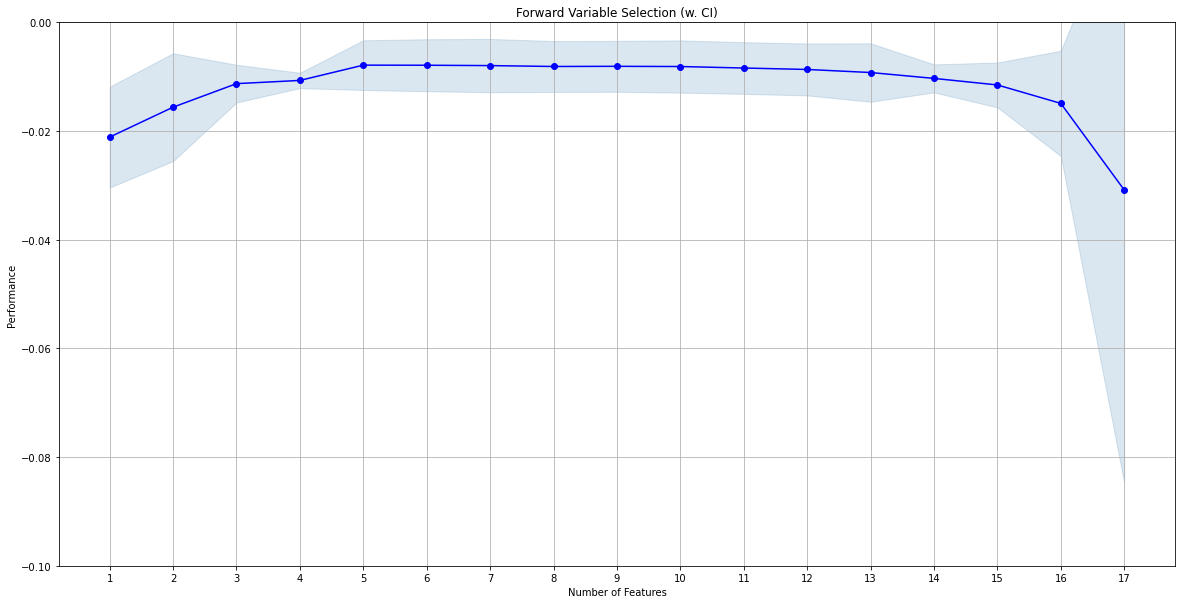

In [20]:
fig_fvs = plot_sfs(fvs.get_metric_dict(), kind='ci',figsize=(20,10))
plt.title('Forward Variable Selection (w. CI)')
plt.grid()
plt.ylim(-0.1, 0)
plt.show()

In [21]:
sfs_results=pd.DataFrame.from_dict(fvs.get_metric_dict()).T
sfs_results.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(16,)","[-0.02395943396201404, -0.011163103140109586, ...",-0.021134,"(NRFIr,)",0.009282,0.005791,0.003343
2,"(3, 16)","[-0.02343593770526533, -0.007242988984061716, ...",-0.015631,"(ST_B6, NRFIr)",0.009919,0.006188,0.003573
3,"(1, 3, 16)","[-0.014026561069685374, -0.008555582721018399,...",-0.011302,"(SR_B4, ST_B6, NRFIr)",0.003476,0.002168,0.001252
4,"(1, 3, 8, 16)","[-0.01148775125924805, -0.011495893913629922, ...",-0.010711,"(SR_B4, ST_B6, DSWI3, NRFIr)",0.001416,0.000884,0.00051
5,"(1, 2, 3, 8, 16)","[-0.00879647317739337, -0.011644943390147745, ...",-0.0079,"(SR_B4, SR_B5, ST_B6, DSWI3, NRFIr)",0.00457,0.002851,0.001646


In [22]:
#backward variable selection(bvs)
bvs = SFS(model,
         k_features='best',
         forward=False,
         floating=True,
         verbose =0,
         cv=4,
          n_jobs=4,
          scoring = 'neg_mean_squared_error') #neg_mean_squared_error

In [23]:
bvs.fit(inputs, t)
# sfs1.k_feature_names_

SequentialFeatureSelector(cv=4,
                          estimator=<mlxtend.regressor.linear_regression.LinearRegression object at 0x7ff3f0623a30>,
                          floating=True, forward=False, k_features=(1, 17),
                          n_jobs=4, scoring='neg_mean_squared_error')

In [24]:
(bvs.k_feature_names_)

('ST_B6', 'CVI', 'DSWI3', 'DSWI4', 'ExG', 'NRFIr')

In [25]:
bvs.k_score_

-0.0073828962358952685

In [26]:
bvs_results=pd.DataFrame.from_dict(bvs.get_metric_dict()).T
bvs_results.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
17,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-0.01286880756585999, -0.08906638049920568, -...",-0.030859,"(SR_B1, SR_B4, SR_B5, ST_B6, AFRI1600, BCC, CV...",0.053904,0.033627,0.019415
16,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...","[-0.013112061272005787, -0.025166762922776018,...",-0.014935,"(SR_B1, SR_B4, SR_B5, ST_B6, AFRI1600, BCC, CV...",0.009688,0.006044,0.003489
15,"(0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 14, 15...","[-0.013326692544380014, -0.01475715406204186, ...",-0.011542,"(SR_B1, SR_B4, SR_B5, ST_B6, AFRI1600, BCC, CV...",0.004123,0.002572,0.001485
14,"(0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 14, 15, 16)","[-0.012112641735499259, -0.014790001646933072,...",-0.010592,"(SR_B1, SR_B4, SR_B5, ST_B6, BCC, CVI, DSWI3, ...",0.00487,0.003038,0.001754
13,"(0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 14, 15, 16)","[-0.01204346476075376, -0.014008026705974638, ...",-0.009899,"(SR_B1, SR_B4, SR_B5, ST_B6, BCC, CVI, DSWI3, ...",0.005421,0.003382,0.001953


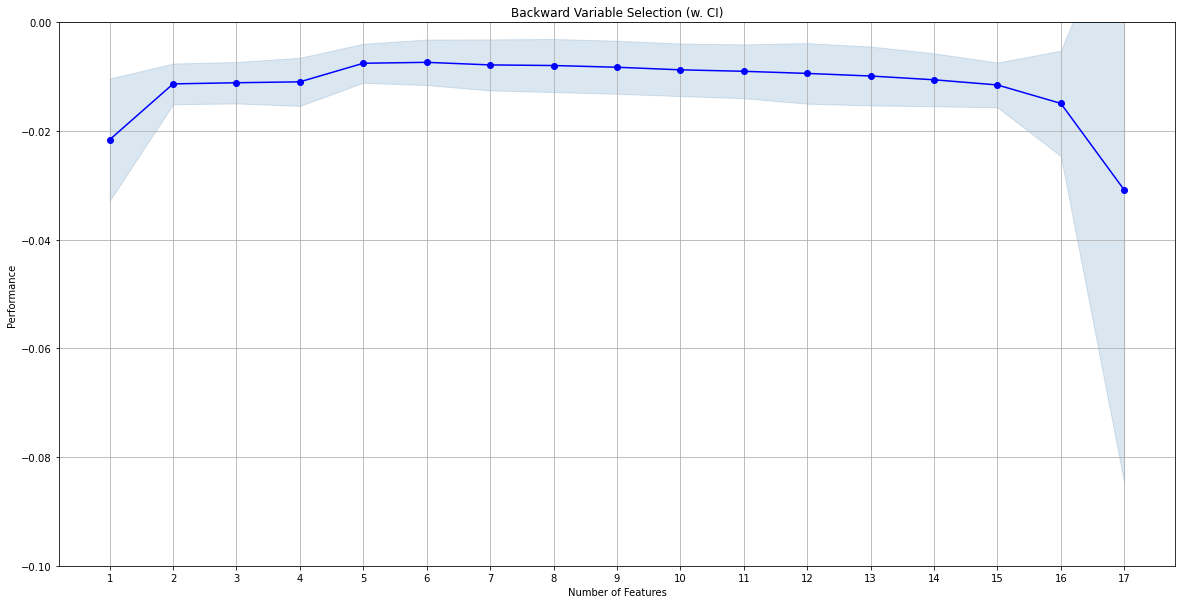

In [27]:
# bvs.k_feature_names_
fig1 = plot_sfs(bvs.get_metric_dict(), kind='ci',figsize=(20,10))
plt.title('Backward Variable Selection (w. CI)')
plt.grid()
plt.ylim(-0.1, 0)
plt.show()

In [35]:
fvs.k_feature_names_

('SR_B4', 'SR_B5', 'ST_B6', 'DSWI3', 'NRFIr')

Let's evaluate the two models (forward and backward regresion)

Evaluating forward regression inputs:

Intercept: 8.44
Slopes:
[[-1.9616627 ]
 [ 1.88522952]
 [-6.04206686]
 [ 0.26009658]
 [ 1.70129577]]


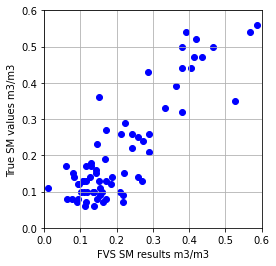

In [32]:
X_fvs=fvs.transform(inputs)

fvs_lr = LinearRegression()
fvs_lr.fit(X_fvs, t)
y=fvs_lr.predict(X_fvs)

print('Intercept: %.2f' % ne_lr.b_)
print('Slopes:')
print(fvs_lr.w_)

plt.scatter(y, t, color='blue')
plt.xlabel('FVS SM results m3/m3')
plt.ylabel('True SM values m3/m3')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.xlim([0, 0.6])
plt.ylim([0, 0.6])
plt.grid()
plt.show()

Let's try the backward regression model

Intercept: 8.44
Slopes:
[[-6.65506095]
 [-0.16289133]
 [ 0.37728045]
 [-0.75208294]
 [-2.55482974]
 [ 1.39002369]]


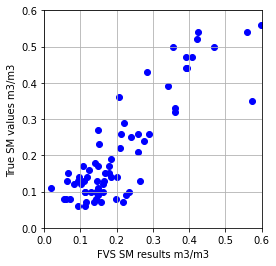

In [33]:
X_bvs=bvs.transform(inputs)

bvs_lr = LinearRegression()
bvs_lr.fit(X_bvs, t)
y=bvs_lr.predict(X_bvs)

print('Intercept: %.2f' % ne_lr.b_)
print('Slopes:')
print(bvs_lr.w_)

plt.scatter(y, t, color='blue')
plt.xlabel('FVS SM results m3/m3')
plt.ylabel('True SM values m3/m3')
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.xlim([0, 0.6])
plt.ylim([0, 0.6])
plt.grid()
plt.show()

We found two winners! In the next step we will apply this FVS and BVS models to all four Landsat images 

Source:

https://towardsdatascience.com/how-to-identify-the-right-independent-variables-for-machine-learning-supervised-algorithms-439986562d32

Saving the regression results in csv files

In [35]:
import os
# defining directory for storing results
out_dir = os.path.join(os.path.expanduser('~'), 'projects/Machine-Learning-Applications-in-Remote-Sensing-Data/Results Step 3/')
out_dir

'/home/jovyan/data/projects/Machine-Learning-Applications-in-Remote-Sensing-Data/Results Step 3/'

In [39]:
filename=os.path.join(out_dir,'fvs_coefficients.csv')

import csv

# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    field1=['Intercept: ']
    csvwriter.writerow(field1) 
    intercept= fvs_lr.b_
    csvwriter.writerow(intercept) 
    field2=['Slopes:']
    csvwriter.writerow(field2) 
        
    # writing the data rows 
    coeffs=fvs_lr.w_
    csvwriter.writerows(coeffs)



In [40]:
filename=os.path.join(out_dir,'bvs_coefficients.csv')

import csv

# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile) 
        
    # writing the fields 
    field1=['Intercept: ']
    csvwriter.writerow(field1) 
    intercept= bvs_lr.b_
    csvwriter.writerow(intercept) 
    field2=['Slopes:']
    csvwriter.writerow(field2) 
        
    # writing the data rows 
    coeffs=bvs_lr.w_
    csvwriter.writerows(coeffs)

